In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,Input,Flatten,Conv2DTranspose,Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = (X_train / 255)
X_train = X_train[...,None]
X_test = (X_test / 255)
X_test = X_test[...,None]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [6]:
encoding_dim = 3

#placeholder
input_img = Input(shape=(28,28,1))

#encoder layers

encoder = Conv2D(6,(4,4),(1,1),activation='relu')(input_img)  #25*25*6
encoder = Conv2D(12,(8,8),(1,1),activation='relu')(encoder)     #18*18*12
encoder = Conv2D(24,(16,16),(1,1),activation='relu')(encoder)   #3*3*24
encoder = Conv2D(48,(2,2),(1,1),activation='relu')(encoder)    #2*2*48
encoder = Flatten()(encoder)                                   # 192
encoder = Dense(encoding_dim)(encoder)                          # 3

#decoder
decoder = Dense(192)(encoder)                                 #192
decoder = Reshape((2,2,48))(decoder)                           #2*2*48
decoder = Conv2DTranspose(24,(2,2),(1,1),activation='relu')(decoder)  #3*3*24
decoder = Conv2DTranspose(12,(16,16),(1,1),activation='relu')(decoder)  #18*18*12
decoder = Conv2DTranspose(6,(8,8),(1,1),activation='relu')(decoder)  #25*25*6
decoder = Conv2DTranspose(3,(4,4),(1,1),activation='sigmoid')(decoder)   #28*28*3

#model auto_encoder
auto_encoder = Model(inputs=input_img,outputs=decoder)
#
encoder_model = Model(inputs=input_img,outputs=encoder)
#compile
auto_encoder.compile(Adam(),tf.losses.mean_squared_error)

In [7]:
auto_encoder.fit(X_train,X_train,64,20,shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0665
Epoch 2/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0446
Epoch 3/20
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0392
Epoch 4/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0365
Epoch 5/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0350
Epoch 6/20
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0340
Epoch 7/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0334
Epoch 8/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0330
Epoch 9/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0326
Epoch 10/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0322
Epoch 11/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0320
Epoch 12/20
60000/6

<IPython.core.display.Javascript object>


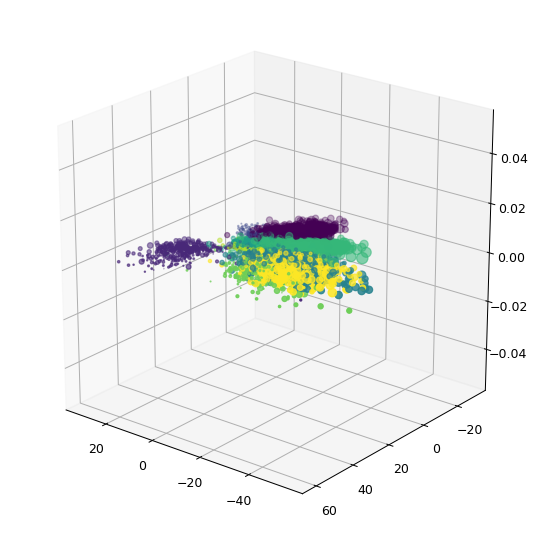

F:\Anaconda\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
encoded_imgs = encoder_model.predict(X_test)

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],encoded_imgs[:,2],c=Y_test)
plt.show()

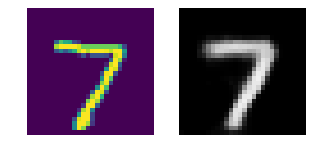

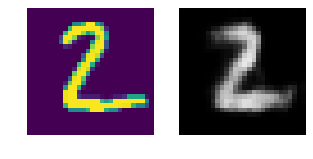

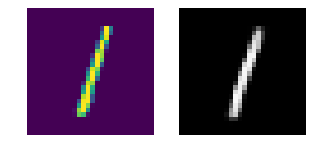

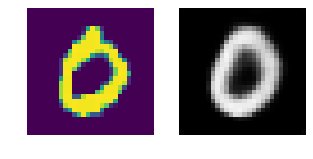

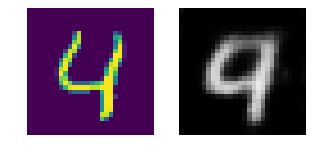

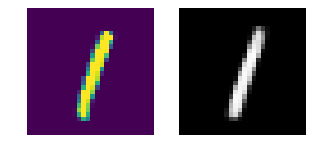

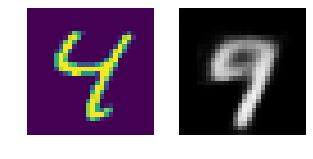

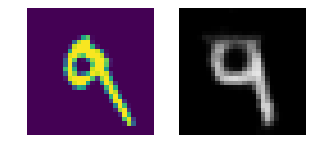

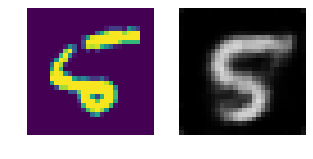

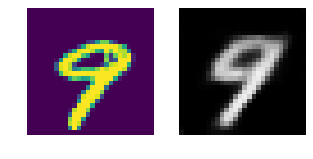

In [13]:
%matplotlib inline
#sample test
SAMPLE_COUNT = 10
for index in range(SAMPLE_COUNT):
    plt.figure(figsize=(5,5))
    data_image = X_test[index]
    image_origin =  np.squeeze(data_image)
    ax = plt.subplot(1,2,1)
    ax.imshow(image_origin)
    ax.axis("off")
    image_coder = auto_encoder.predict(data_image[None,...])
    image_coder = np.squeeze(image_coder)
    ax = plt.subplot(1,2,2)
    ax.imshow(image_coder)
    ax.axis("off")
    plt.show()